# Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importation des datas

In [3]:
données = pd.read_excel("data_fifa_clean.xlsx")

In [ ]:
# on lit le dataset
données

# CRITERES PHYSIQUES

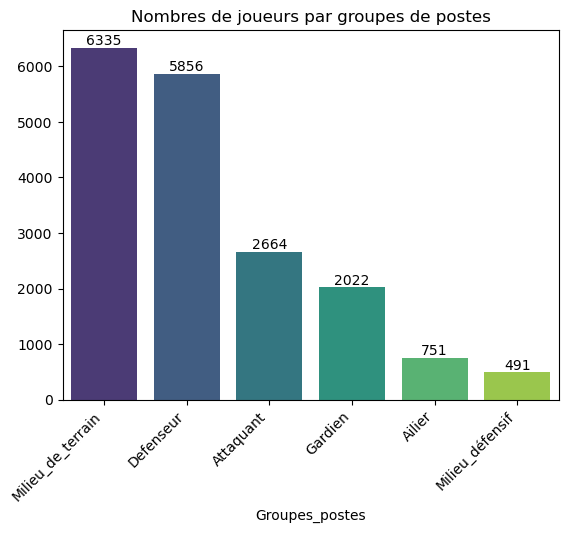

In [6]:
# distribution des joueurs par groupes de postes
Occurences_joueurs_par_poste = données["Groupes_postes"].value_counts().sort_values(ascending=False)
sns.barplot(x=Occurences_joueurs_par_poste.index, y=Occurences_joueurs_par_poste.values, palette="viridis")
for i, v in enumerate(Occurences_joueurs_par_poste):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(rotation=45, ha='right')
plt.title("Nombres de joueurs par groupes de postes")
plt.show()

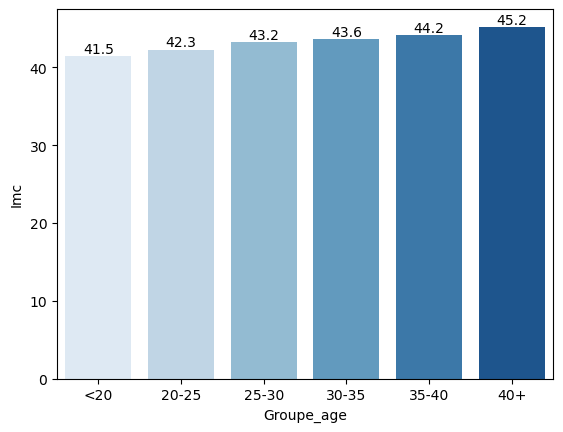

In [7]:
# On définit les intervalles d'age (borne inférieure et supérieure)
bins = [0, 20, 25, 30, 35, 40, float('inf')]

# On définit légende de chaque groupe d'age 
labels = ['<20', '20-25', '25-30', '30-35', '35-40', '40+']

# On ajoute une colonne Groupe_age au DataFrame
données['Groupe_age'] = pd.cut(données['Age'], bins=bins, labels=labels, right=False)

# On calcule la moyenne des IMC par groupe d'age 
moyennes_imc_par_groupe = données.groupby('Groupe_age')['Imc'].mean().reset_index()
sns.barplot(x='Groupe_age', y='Imc', data=moyennes_imc_par_groupe, palette="Blues")
for i, v in enumerate(moyennes_imc_par_groupe['Imc']):
    plt.text(i, v , str(round(v,1)), ha='center', va='bottom', fontsize=10, color='black')
plt.show()


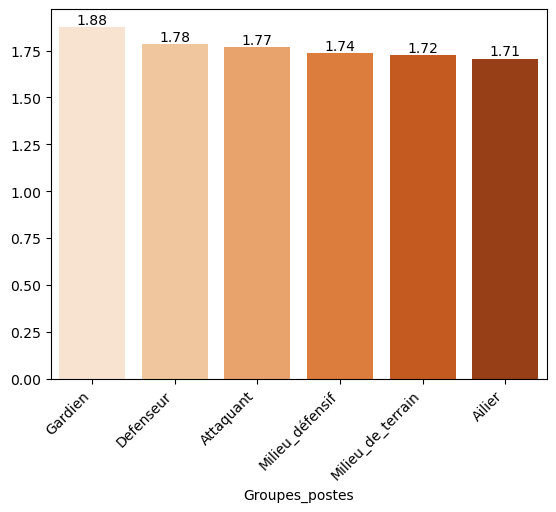

In [8]:
# taille moyenne par Groupe de poste 

taille_moyenne = données.groupby("Groupes_postes")["Height"].mean().sort_values(ascending=False)
sns.barplot(x=taille_moyenne.index, y=taille_moyenne.values, palette="Oranges")
for i, v in enumerate(taille_moyenne):
    plt.text(i,v, str(round(v,2)), ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(rotation=45, ha='right')
plt.show()

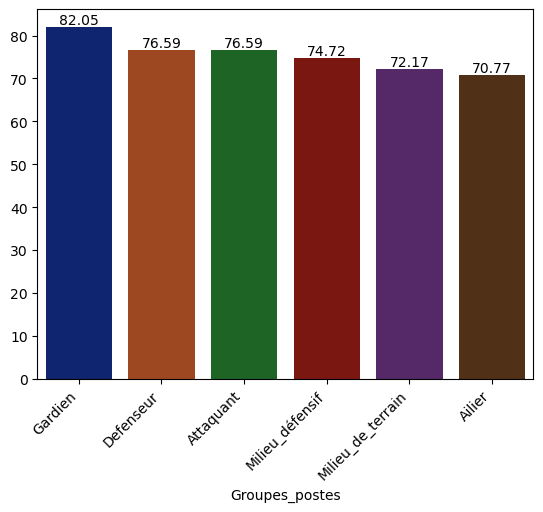

In [60]:
# Poids moyen par Groupe de poste 

taille_moyenne = données.groupby("Groupes_postes")["Weight"].mean().sort_values(ascending=False)
sns.barplot(x=taille_moyenne.index, y=taille_moyenne.values,palette="dark")
for i, v in enumerate(taille_moyenne):
    plt.text(i,v, str(round(v,2)), ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(rotation=45, ha='right')
plt.show()

# CRITERES TECHNIQUES

## Fonctions 

In [35]:
"""___________________FONCTION POUR GROUPER ET CALCULER LA MOYENNE DES COMPETENCES PAR GROUPE DE POSTES_____________________"""


def moyenne_compétences_groupées (Groupe_postes=""):
    
    index_colonne_debut = données.columns.get_loc("Moyenne_Offensive")
    colonnes_competences = données.columns[index_colonne_debut:]
    données_groupe = données[données["Groupes_postes"]== Groupe_postes]
    moyennes_groupe = données_groupe[colonnes_competences].mean().sort_values(ascending=False)
    
    return moyennes_groupe


"""___________________________FONCTION POUR CREER LE GRAPHIQUE RADAR POUR CHAQUE GROUPE DE POSTE____________________________"""

    
def radar(label="",moyenne_gérée=[],couleur=""):
    categories = list(categories_evaluations.keys())
    num_categories = 7

    # On Crée les angles pour le graphique radar
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

    # On Complète le graphique radar (On ferme la forme en ajoutant le premier élément à la fin)
    moyenne_gérée = np.append(moyenne_gérée, moyenne_gérée[0])
    angles += angles[:1]

    # On Trace le graphique radar
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.plot(angles, moyenne_gérée, color=couleur, linewidth=1)
    ax.fill(angles, moyenne_gérée, color=couleur, alpha = 0.13, label=label)


    # On ajoute des étiquettes pour chaque catégorie
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # On ajoute une légende
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    # On affiche le graphique radar
    return plt.show()

"""___________________________FONCTION POUR VOIR LA DISTRIBUTION DES COMPETENCES PAR GROUPE DE POSTES________________________"""

    
def distribution_moyenne_compétences(Groupes_postes=""):
    index_colonne_debut = données.columns.get_loc("Crossing")
    index_colonne_fin = données.columns.get_loc("Groupes_postes")
    colonnes_competences = données.columns[index_colonne_debut:index_colonne_fin]
    données_poste = données[données["Groupes_postes"]== Groupes_postes]
    moyennes_compétences = données_poste[colonnes_competences].mean().sort_values(ascending=False)
    plt.figure(figsize=(9, 7))
    sns.barplot(x=moyennes_compétences.index, y=moyennes_compétences.values , palette= "viridis")
    for i, v in enumerate(moyennes_compétences):
        plt.text(i,v+1, str(round(v,1)), ha='center', va='bottom', fontsize=10, color='black', rotation=90)
    plt.xticks(rotation=45, ha='right')
    return plt.show()  



"""__________________FONCTION POUR VOIR LA DISTRIBUTION DES COMPETENCES_GROUPEES PAR GROUPE DE POSTES________________________"""



def distribution_compétences_groupées(Groupe_postes="", titre=""):
    moyenne = moyenne_compétences_groupées(Groupe_postes=Groupe_postes)
    sns.barplot(x=moyenne.index, y=moyenne.values, palette="dark")
    for i, v in enumerate(moyenne):
        plt.text(i, v, str(round(v,1)), ha='center', va='bottom', fontsize=10, color='black')
    plt.xticks(rotation=45, ha='right')
    plt.title(titre)
    return plt.show()

## Graphiques

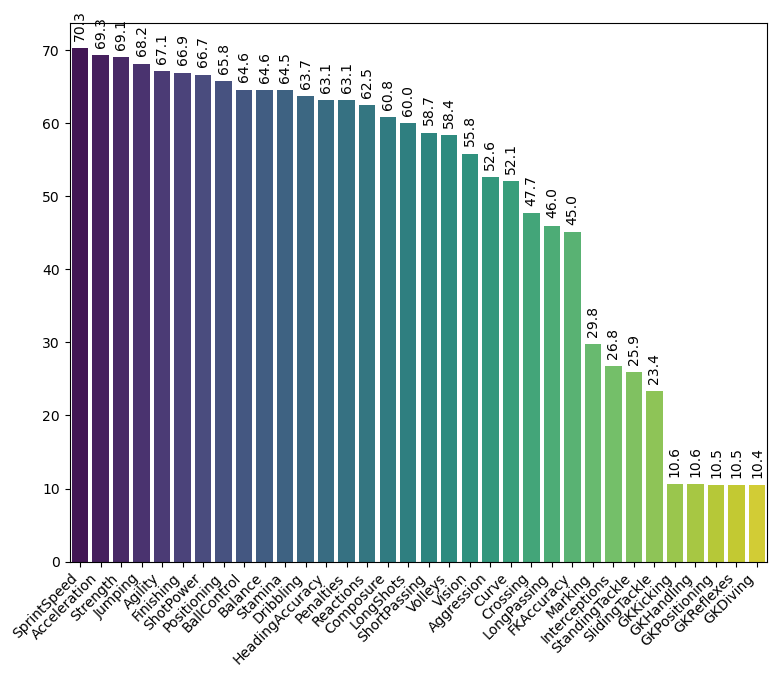

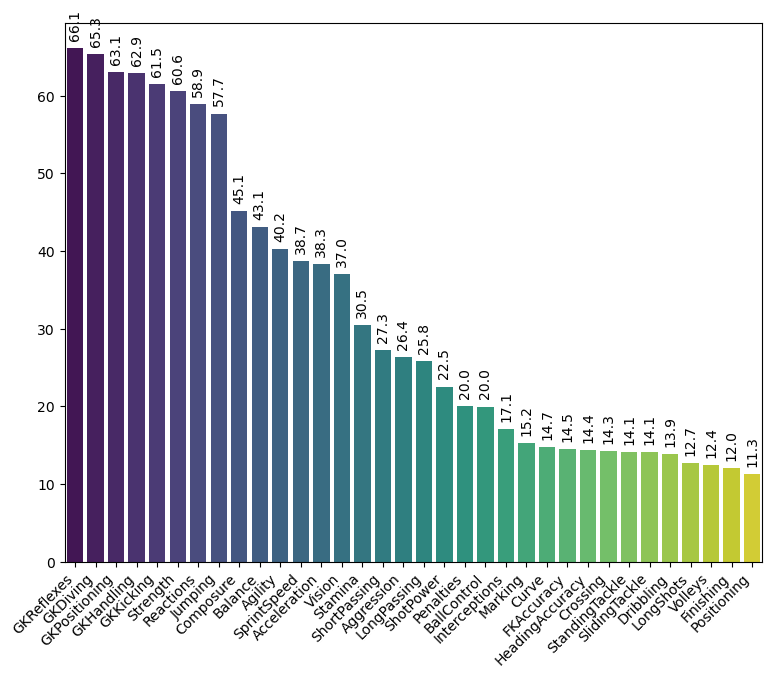

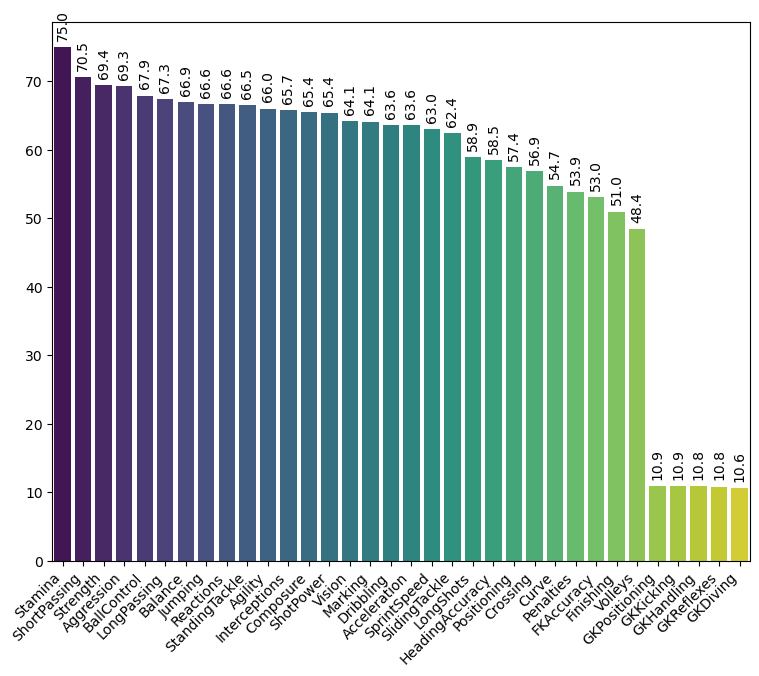

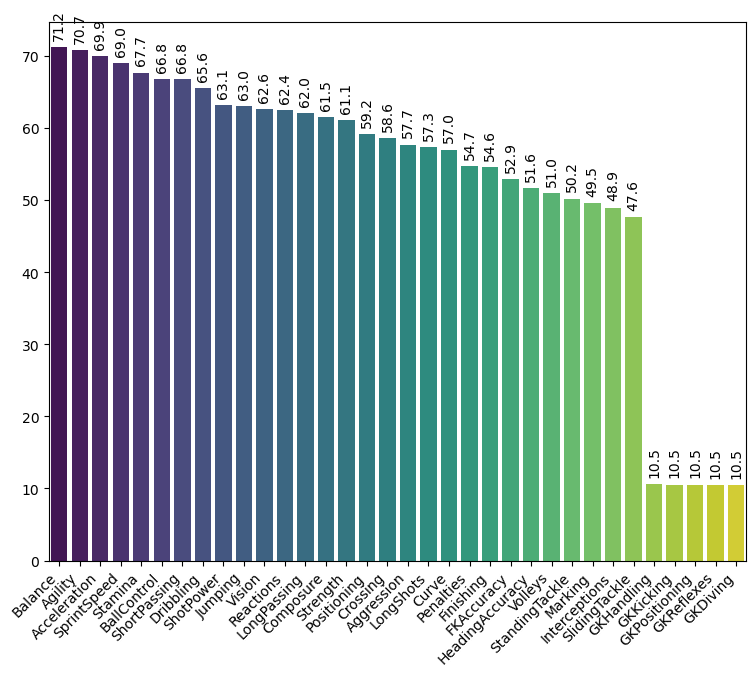

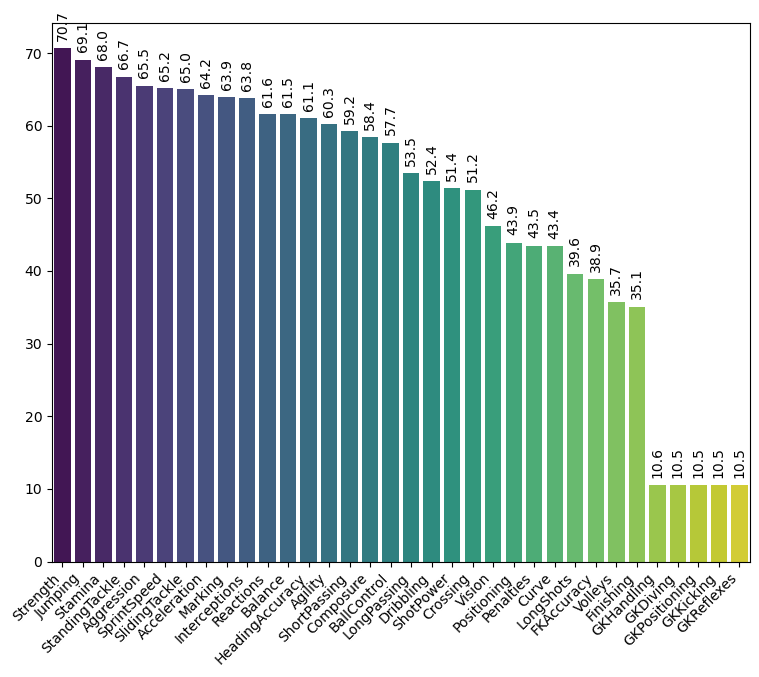

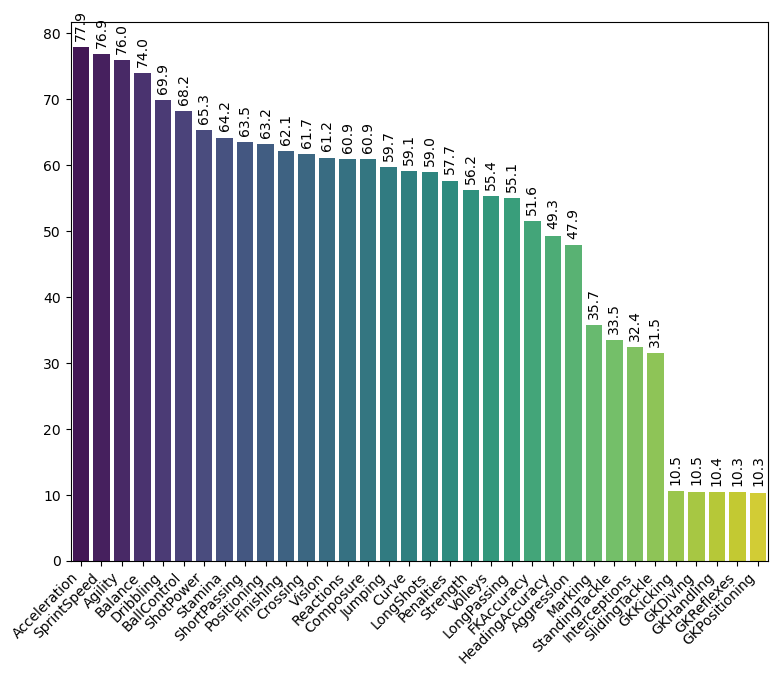

In [36]:
# On génère les graphiques à partir des fonction crées

distribution_moyenne_compétences(Groupes_postes="Attaquant")
distribution_moyenne_compétences(Groupes_postes="Gardien")
distribution_moyenne_compétences(Groupes_postes="Milieu_défensif")
distribution_moyenne_compétences(Groupes_postes="Milieu_de_terrain")
distribution_moyenne_compétences(Groupes_postes="Defenseur")
distribution_moyenne_compétences(Groupes_postes="Ailier")

In [38]:
# Liste des catégories et des compétences associées
categories_evaluations = {
    "Offensive": ["Crossing", "Finishing", "Volleys", "Dribbling", "Curve", "FKAccuracy", "LongShots"],
    "Controles": ["ShortPassing", "LongPassing", "BallControl", "Vision"],
    "Vitesse": ["Agility", "SprintSpeed", "Acceleration"],
    "Force": ["Jumping", "ShotPower", "Stamina", "Strength"],
    "Réactivité": ["Reactions", "Balance", "Aggression", "Composure"],
    "Défense": ["Marking", "StandingTackle", "SlidingTackle", "Interceptions"],
    "Vision": ["Positioning", "Vision", "Penalties"]
}

# Calculer la moyenne pour chaque catégorie et ajouter les colonnes au DataFrame
for categorie, competences in categories_evaluations.items():
    données[f"Moyenne_{categorie}"] = données[competences].mean(axis=1)

### Ces graphiques en radar représentent les compétences des joueurs selon 7 critères globaux de compétences des joeurs de foot par groupe de poste.

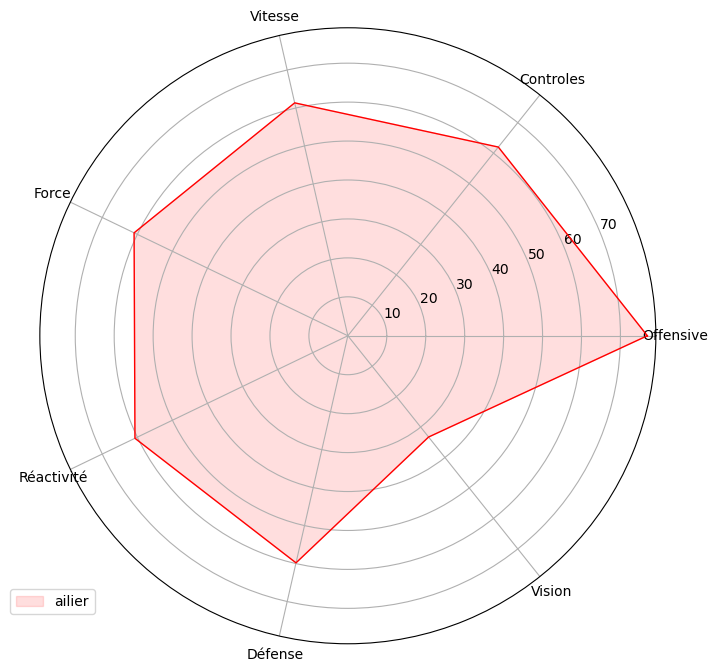

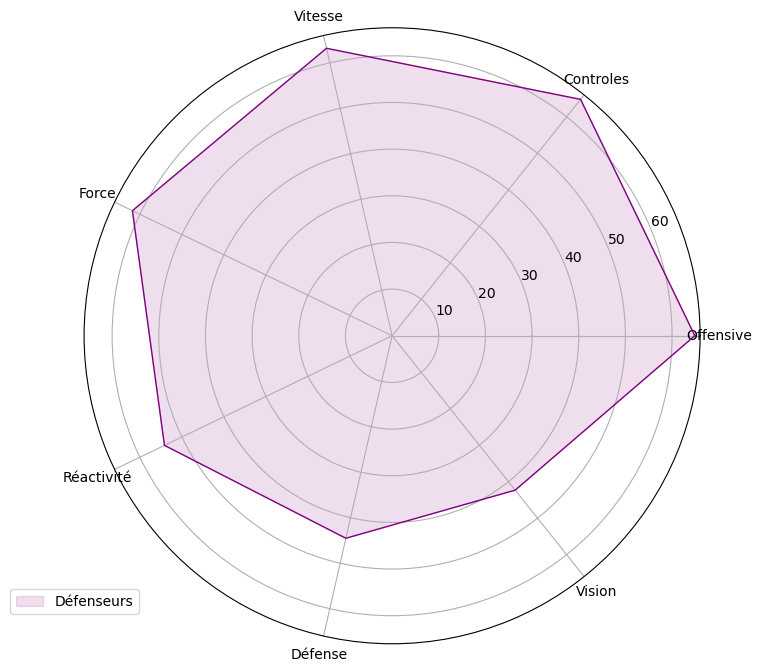

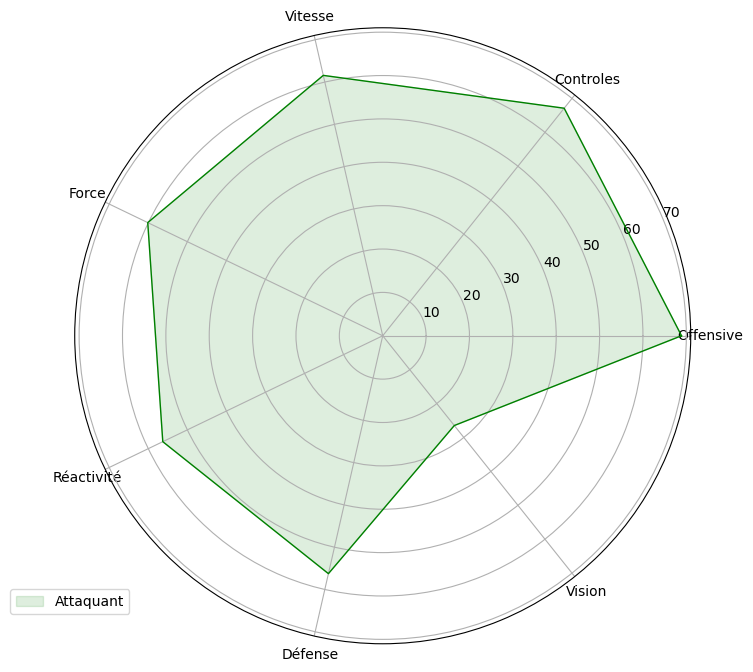

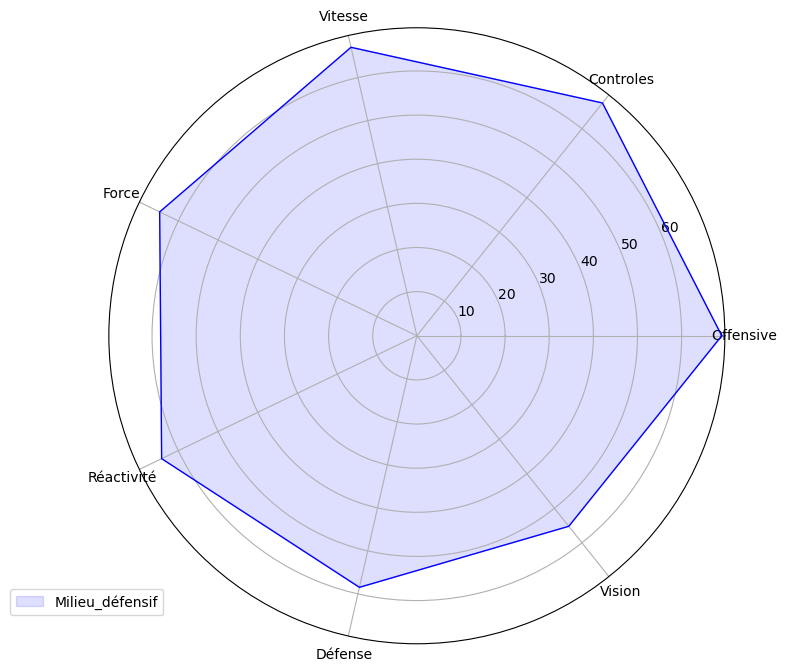

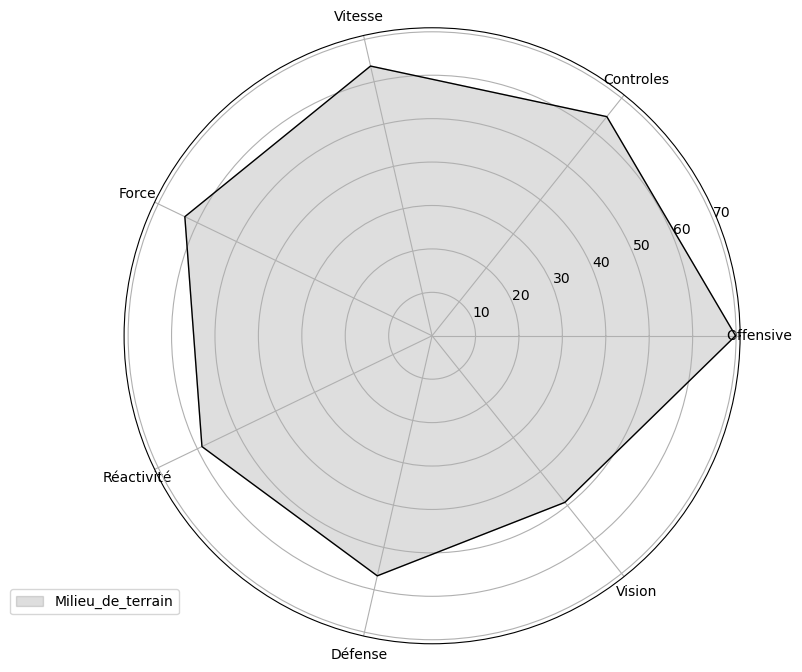

In [39]:
radar(label="ailier",moyenne_gérée=moyenne_compétences_groupées(Groupe_postes="Ailier"),couleur="red")
radar(label="Défenseurs",moyenne_gérée=moyenne_compétences_groupées(Groupe_postes="Defenseur"),couleur="purple")
radar(label="Attaquant",moyenne_gérée=moyenne_compétences_groupées(Groupe_postes="Attaquant"),couleur="green")
radar(label="Milieu_défensif",moyenne_gérée=moyenne_compétences_groupées(Groupe_postes="Milieu_défensif"),couleur="blue")
radar(label="Milieu_de_terrain",moyenne_gérée=moyenne_compétences_groupées(Groupe_postes="Milieu_de_terrain"),couleur="black")

### Ces graphes viennent en complément des précédent et donnent des infos plus détaillés sur les compétences des joueurs par groupe de poste 

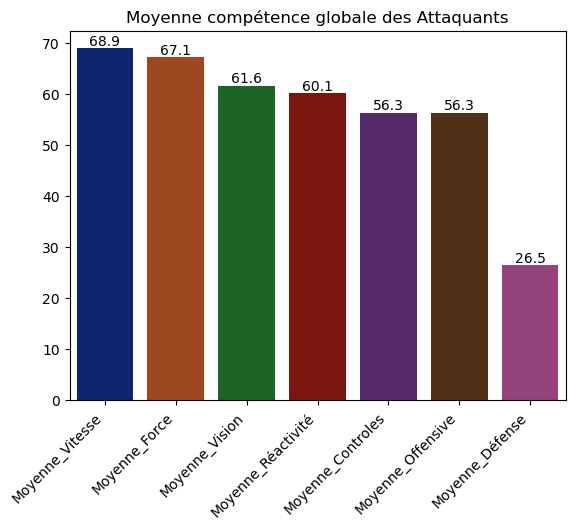

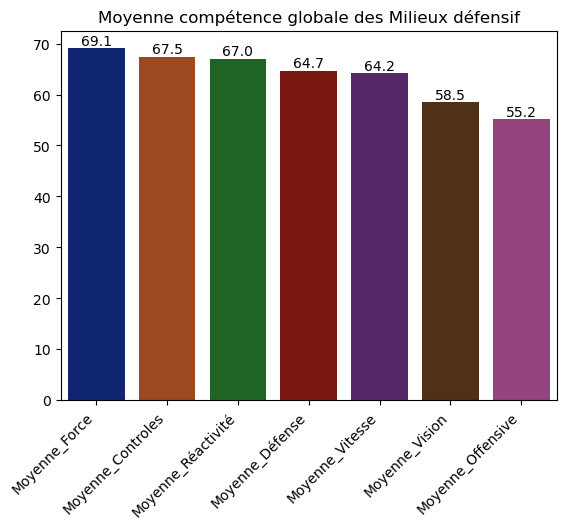

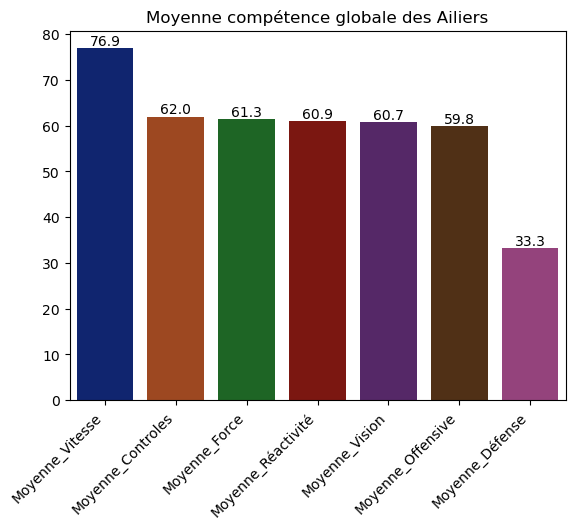

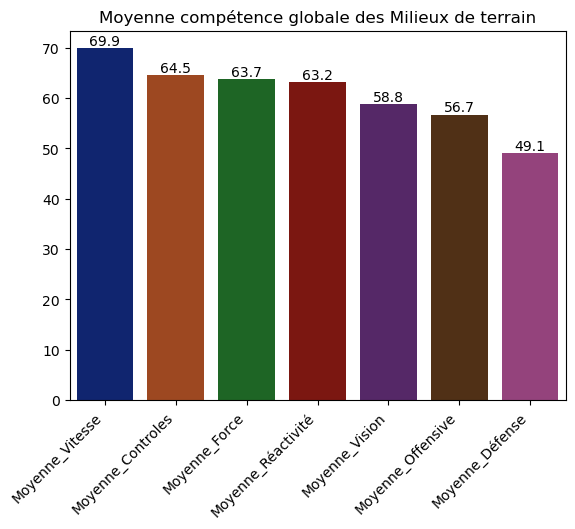

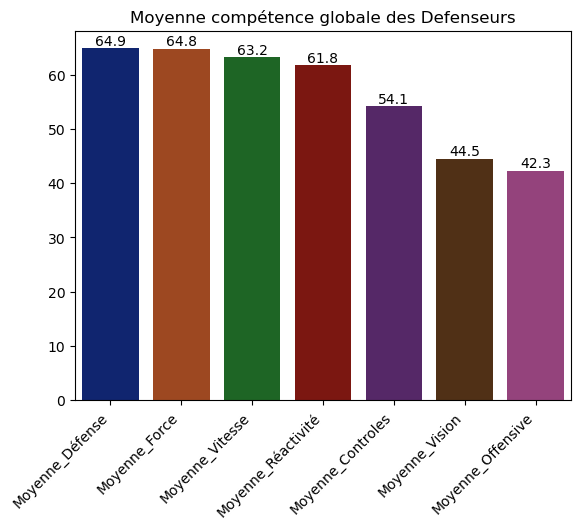

In [86]:
distribution_compétences_groupées(Groupe_postes="Attaquant",titre="Moyenne compétence globale des Attaquants")
distribution_compétences_groupées(Groupe_postes="Milieu_défensif",titre="Moyenne compétence globale des Milieux défensif")
distribution_compétences_groupées(Groupe_postes="Ailier",titre="Moyenne compétence globale des Ailiers")
distribution_compétences_groupées(Groupe_postes="Milieu_de_terrain",titre="Moyenne compétence globale des Milieux de terrain")
distribution_compétences_groupées(Groupe_postes="Defenseur",titre="Moyenne compétence globale des Defenseurs")